# Machine Learning Workflow: Mathematical Foundations and Data Processing

This notebook is designed to build your foundational skills in Python, NumPy, and Matplotlib within the context of **machine learning data processing**. This is not just a programming exercise—you'll learn the essential mathematical and computational concepts that underpin modern data science.

## Learning Objectives

By completing this notebook, we will have brushed up your knowledge about the following topics:

### 1. **Mathematical Foundations**
- **Linear algebra operations** using NumPy arrays (vectors, matrices, tensor operations)
- **Statistical measures** and their computational implementation
- **Normalization techniques** and their mathematical formulations
- **Distance metrics** and similarity measures

### 2. **Data Structures and Representations**
- **Tabular data**: Feature matrices $\mathbf{X} \in \mathbb{R}^{n \times d}$ where $n$ = samples, $d$ = features
- **Image data**: Multi-dimensional tensors $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$ (Height × Width × Channels)
- **Label vectors**: Target variables $\mathbf{y} \in \{0, 1, ..., k-1\}^n$ for classification

### 3. **Core Data Science Operations**
- **Indexing and slicing**: Efficient data access patterns
- **Statistical analysis**: Descriptive statistics, distributions, and visualizations
- **Data preprocessing**: Normalization, standardization, and encoding techniques
- **Visualization**: Exploratory data analysis through plots and graphs

### 4. **Mathematical Preprocessing Techniques**
- **Min-Max Normalization**: $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$
- **Z-Score Standardization**: $x_{std} = \frac{x - \mu}{\sigma}$
- **Unit Vector Normalization**: $\mathbf{x}_{unit} = \frac{\mathbf{x}}{||\mathbf{x}||_2}$

---

**Prerequisites**: Basics in Python and its core data science packages: `matplotlib` and `numpy`. If you encounter difficulties with Python syntax, NumPy operations, or Matplotlib plotting, please refer to the specialized notebooks:
- `python_basics.ipynb` for Python fundamentals
- `numpy.ipynb` for NumPy array operations
- `matplotlib.ipynb` for data visualization techniques


---

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml

# Initialise matplotlib settings
def setup_matplotlib():
    """
    Configure matplotlib for better visualization quality.
    
    Returns:
    --------
    None
        Configures global matplotlib settings for the notebook.
    """
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3

setup_matplotlib()

✓ Libraries imported and matplotlib configured successfully!


## 1. Loading and Understanding Tabular Feature Datasets

### Mathematical Representation of Tabular Data

In machine learning, tabular data is represented as a **feature matrix** $\mathbf{X} \in \mathbb{R}^{n \times d}$:

$$\mathbf{X} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{pmatrix}$$

Where:
- $n$ = number of **samples** (observations, data points)
- $d$ = number of **features** (dimensions, attributes)
- $x_{i,j}$ = value of feature $j$ for sample $i$

Each **row** $\mathbf{x}_i = (x_{i,1}, x_{i,2}, ..., x_{i,d})$ represents one data sample.
Each **column** represents one feature across all samples.

### The Iris Dataset: A Classic ML Example

The **Iris dataset** (Fisher, 1936) is a foundational dataset in pattern recognition and machine learning:

**Dataset Properties:**
- **$n = 150$ samples** (50 from each of 3 species)
- **$d = 4$ features**: All continuous numerical measurements in centimeters
  1. Sepal length: $x_1 \in [4.3, 7.9]$ cm
  2. Sepal width: $x_2 \in [2.0, 4.4]$ cm  
  3. Petal length: $x_3 \in [1.0, 6.9]$ cm
  4. Petal width: $x_4 \in [0.1, 2.5]$ cm
- **$k = 3$ classes**: Setosa, Versicolor, Virginica (perfectly balanced)

**Why is this dataset important?**
- **Linear separability**: Setosa is linearly separable from the other classes
- **Non-linear separability**: Versicolor and Virginica overlap in feature space
- **Real-world complexity**: Demonstrates realistic classification challenges
- **Educational value**: Small enough to visualize, complex enough to be meaningful

### The Target Vector Representation

The **target vector** $\mathbf{y} \in \{0, 1, 2\}^{150}$ encodes class membership:
- $y_i = 0$ for Setosa samples
- $y_i = 1$ for Versicolor samples  
- $y_i = 2$ for Virginica samples

This is called **label encoding** or **integer encoding** of categorical variables.

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the load_iris_dataset() function below. 

Your implementation should: 

1. Import the iris dataset from scikit-learn using sklearn. 
2. Extract the components: feature matrix X, target vector y, feature names, and target names. 
3. Print basic information about the dataset: 
    - Dataset shape (number of samples and features), 
    - Feature names and their ranges (min/max values)
    - Target names and class distribution.
4. Return all components as a tuple: (X, y, feature_names, target_names)
</div>

In [ ]:
# Hints:
# - Use: from sklearn.datasets import load_iris
# - The loaded dataset has attributes: .data, .target, .feature_names, .target_names
# - Use np.unique(y, return_counts=True) to get class distribution
# - Use np.min() and np.max() to find feature ranges

def load_iris_dataset():
    """
    Load the Iris dataset from scikit-learn and print basic information.
    
    Returns:
    --------
    tuple: (X, y, feature_names, target_names)
        X : numpy.ndarray of shape (150, 4)
            Feature matrix containing sepal/petal measurements
        y : numpy.ndarray of shape (150,)
            Target labels (0=Setosa, 1=Versicolor, 2=Virginica)
        feature_names : list of str
            Names of the 4 features
        target_names : list of str
            Names of the 3 species classes

    """
    raise NotImplementedError("Implement the function to load the Iris dataset.")
    
    return X, y, feature_names, target_names

✓ Iris dataset loaded successfully!
  Features shape: (150, 4)
  Target shape: (150,)
  Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Load the dataset
X, y, feature_names, target_names = load_iris_dataset()

### 1.1 Exploratory Data Analysis (EDA): Understanding Your Data

Before applying any machine learning algorithm, you must understand your data's **structure**, **distribution**, and **quality**. This process is called **Exploratory Data Analysis (EDA)**.

**Key Questions to Answer:**

1. **Shape and Dimensionality**
   - How many samples $n$ and features $d$?
   - What is the data complexity? (High-dimensional data requires different approaches)

2. **Data Types and Ranges**
   - Are features continuous, discrete, or categorical?
   - What are the value ranges for each feature?
   - Are there natural units (e.g., cm, pixels, counts)?

3. **Statistical Properties**
   - **Central tendency**: Mean $\mu = \frac{1}{n}\sum_{i=1}^n x_i$
   - **Variability**: Standard deviation $\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \mu)^2}$
   - **Range**: $[x_{min}, x_{max}]$

4. **Data Quality**
   - Missing values? (Requires imputation strategies)
   - Outliers? (May need robust preprocessing)
   - Class balance? (Imbalanced datasets need special handling)

5. **Feature Relationships**
   - Are features correlated? (Multicollinearity affects some algorithms)
   - Which features might be most discriminative?

**Mathematical Note**: Computing statistics across the **sample axis** (axis=0) gives feature-wise statistics, while computing across the **feature axis** (axis=1) gives sample-wise statistics.

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the analyze_dataset_structure() function below.
    
Your implementation should:

1. Extract dataset dimensions (n_samples, n_features) from X.shape
2. Display the first 5 samples from the dataset
3. Compute feature-wise statistics using NumPy:
    - Mean values for each feature (across all samples)
    - Standard deviation for each feature
    - Minimum and maximum values for each feature
4. Analyze class distribution:
    - Count how many samples belong to each class
    - Calculate percentages for each class
5. Print results with class names from target_names
6. Return a dictionary with shape, statistics, and class_distribution

</div>

In [ ]:
def analyze_dataset_structure(X, y, feature_names, target_names):
    """
    Perform comprehensive exploratory data analysis on a tabular dataset.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    
    Returns:
    --------
    dict : Analysis results containing:
        - 'shape': Dataset dimensions
        - 'statistics': Mean, std, min, max per feature
        - 'class_distribution': Sample count per class

    """

    raise NotImplementedError("Implement the function to analyze dataset structure.")

    # Shape Information
    n_samples, n_features =

    # Feature-wise statistics
    feature_stats = {
        'mean': ,
        'std': ,
        'min': ,
        'max': 
    }

    # Dataset class distribution
    class_distribution = 
    
    return {
        'shape': (n_samples, n_features),
        'statistics': feature_stats,
        'class_distribution': class_distribution
    }

DATASET STRUCTURE ANALYSIS
Dataset Shape: (150, 4)
Number of samples: 150
Number of features: 4

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

FEATURE-WISE STATISTICS:
Mean per feature: [5.84333333 3.05733333 3.758      1.19933333]
Std per feature:  [0.82530129 0.43441097 1.75940407 0.75969263]
Min per feature:  [4.3 2.  1.  0.1]
Max per feature:  [7.9 4.4 6.9 2.5]

CLASS DISTRIBUTION:
  setosa: 50 samples (33.3%)
  versicolor: 50 samples (33.3%)
  virginica: 50 samples (33.3%)


In [ ]:
# Analyze the Iris dataset
analysis_results = analyze_dataset_structure(X, y, feature_names, target_names)

## 2. Image Data: Multi-Dimensional Arrays and Computer Vision Foundations

### Mathematical Representation of Images

Unlike tabular data, **images** are represented as **multi-dimensional tensors**:

**Grayscale Images**: $\mathbf{I} \in \mathbb{R}^{H \times W}$
$$\mathbf{I} = \begin{pmatrix}
I_{1,1} & I_{1,2} & \cdots & I_{1,W} \\
I_{2,1} & I_{2,2} & \cdots & I_{2,W} \\
\vdots & \vdots & \ddots & \vdots \\
I_{H,1} & I_{H,2} & \cdots & I_{H,W}
\end{pmatrix}$$

**Color Images**: $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$ where:
- $H$ = height (number of rows/pixels vertically)
- $W$ = width (number of columns/pixels horizontally)  
- $C$ = channels (1 for grayscale, 3 for RGB, 4 for RGBA)
- $I_{i,j,c}$ = intensity of pixel at position $(i,j)$ in channel $c$

### Pixel Intensity and Color Spaces

**Pixel Intensities**:
- **8-bit images**: Integer values $I_{i,j} \in \{0, 1, 2, ..., 255\}$
  - 0 = black (no intensity)
  - 255 = white (maximum intensity)
- **Normalized images**: Float values $I_{i,j} \in [0, 1]$
  - 0.0 = black, 1.0 = white
  - Common in deep learning (better numerical stability)

**RGB Color Space**: Each pixel has three components $(R, G, B)$
- $R$ = Red channel intensity
- $G$ = Green channel intensity  
- $B$ = Blue channel intensity
- Combined they produce the perceived color

### The MNIST Dataset: Handwritten Digit Recognition

**MNIST** (Modified National Institute of Standards and Technology) is the "Hello World" of computer vision:

**Dataset Properties**:
- **70,000 images** total (60,000 training + 10,000 test)
- **28×28 pixels** per image ($H = W = 28$)
- **Grayscale** ($C = 1$, single channel)
- **10 classes**: Digits 0, 1, 2, ..., 9
- **Pixel values**: $I_{i,j} \in [0, 255]$ (8-bit grayscale)

**Mathematical Representation**:
- Feature matrix: $\mathbf{X} \in \mathbb{R}^{70000 \times 784}$ (flattened pixels)
- Image tensor: $\mathbf{I} \in \mathbb{R}^{70000 \times 28 \times 28}$ (spatial structure preserved)
- Target vector: $\mathbf{y} \in \{0, 1, 2, ..., 9\}^{70000}$

**Why is MNIST important?**
- **Benchmark dataset**: Standard for comparing algorithm performance
- **Manageable size**: Small enough for quick experimentation
- **Real-world relevance**: Basis for OCR (Optical Character Recognition) systems
- **Visualization**: Easy to see what the algorithm is learning

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the load_mnist_dataset() function below. 

Your implementation should: 

1. Import the MNIST dataset from scikit-learn using sklearn.datasets.fetch_openml
2. Load the dataset with name="mnist_784" and version=1
3. Extract images and labels from the dataset
4. Limit the dataset to max_samples if specified
5. Reshape images to proper format (n_samples, 28, 28) for visualization
6. Convert labels to integers
7. Print dataset information (shape, pixel value range, available digits, samples per class)
8. Return the processed images and labels
    
    
</div>

Loading MNIST dataset (this may take a moment)...
✓ MNIST dataset loaded successfully!
  Dataset shape: (5000, 28, 28)
  Image dimensions: 28×28 pixels
  Pixel value range: [0, 255]
  Available digits: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
  Samples per class: ~500


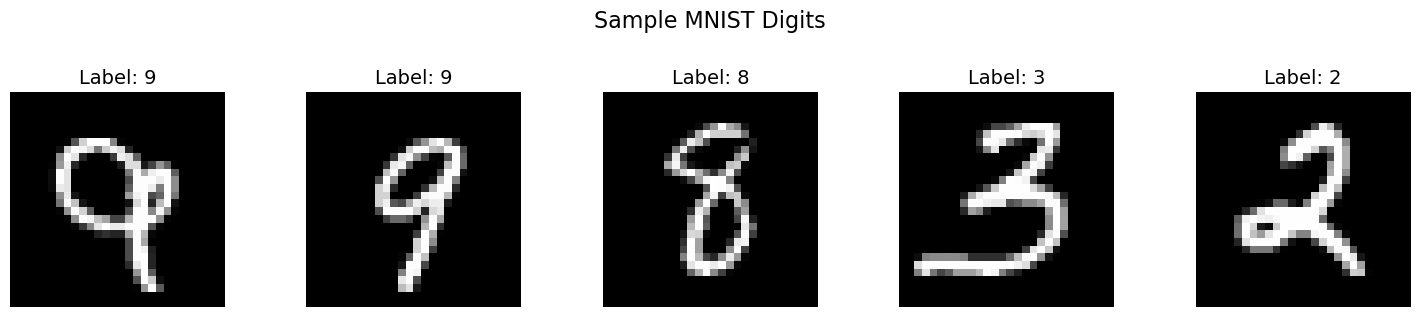

In [ ]:
# Notes:
# ------
# - Original MNIST images are 28x28 pixels, grayscale
# - Pixel intensities range from 0 (black) to 255 (white)
# - Dataset is balanced with ~7000 samples per digit class

def load_mnist_dataset(max_samples=5000):
    """
    Load the MNIST handwritten digits dataset from scikit-learn.
    
    Parameters:
    -----------
    max_samples : int, default=5000
        Maximum number of samples to load (for faster processing in tutorials).
        Set to None to load all 70,000 samples.
    
    Returns:
    --------
    tuple: (images, labels)
        images : numpy.ndarray of shape (n_samples, 28, 28)
            Grayscale images with pixel values in [0, 255]
        labels : numpy.ndarray of shape (n_samples,)
            Integer labels from 0-9 representing digit classes

    """
    print("Loading MNIST dataset (this may take a moment)...")
    
    # Load data from OpenML
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    
    # Convert to numpy arrays and reshape
    images = np.array(mnist.data, dtype=np.float32).reshape(-1, 28, 28)
    labels = np.array(mnist.target, dtype=int)
    
    # Subsample if requested (for faster processing)
    if max_samples is not None and len(images) > max_samples:
        indices = np.random.choice(len(images), max_samples, replace=False)
        images = images[indices]
        labels = labels[indices]
    
    print(f"✓ MNIST dataset loaded successfully!")
    print(f"  Dataset shape: {images.shape}")
    print(f"  Image dimensions: {images.shape[1]}×{images.shape[2]} pixels")
    print(f"  Pixel value range: [{images.min():.0f}, {images.max():.0f}]")
    print(f"  Available digits: {sorted(np.unique(labels))}")
    print(f"  Samples per class: ~{len(images) // 10}")
    
    return images, labels



# Load MNIST dataset (using subset for faster processing)
images, labels = load_mnist_dataset(max_samples=5000)

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the visualize_sample_images() function below. 

Your implementation should: 

1. Create a subplot grid using plt.subplots
2. Handle the special case when n_samples=1 (axes becomes a single object, not array)
3. For each subplot:
    - Display the image using imshow() with grayscale colormap
    - Set appropriate pixel value range
    - Add title showing the label for that image
    - Remove axis ticks and labels
5. Add an overall title to the entire figure
6. Display the plot
    
</div>

In [ ]:
def visualize_sample_images(images, labels, n_samples=5, title="Sample Images"):
    """
    Display a grid of sample images with their labels.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels for each image
    n_samples : int, default=5
        Number of images to display
    title : str, default="Sample Images"
        Title for the plot
    """

    raise NotImplementedError("Implement the function to visualize sample images.")

    # Leave as is
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize sample images
visualize_sample_images(images, labels, n_samples=5, title="Sample MNIST Digits")

## 3. Array Indexing and Slicing: Mathematical Operations on Data

**Array indexing** is not just a programming concept—it's a fundamental mathematical operation for **data selection** and **subsetting**. In machine learning, we constantly need to:

- **Select subsets** of data for training/validation/testing
- **Extract specific features** for analysis
- **Filter data** based on conditions
- **Crop images** to focus on regions of interest

### Mathematical Notation for Data Slicing

**For tabular data** $\mathbf{X} \in \mathbb{R}^{n \times d}$:

**Row Selection** (Sample subset):
- $\mathbf{X}_{[i:j, :]}$ = rows $i$ through $j-1$, all columns
- $\mathbf{X}_{[I, :]}$ where $I = \{i_1, i_2, ..., i_k\}$ = specific rows

**Column Selection** (Feature subset):
- $\mathbf{X}_{[:, j]}$ = all rows, column $j$ (single feature)
- $\mathbf{X}_{[:, J]}$ where $J = \{j_1, j_2, ..., j_m\}$ = feature subset

**Boolean Indexing** (Conditional selection):
- $\mathbf{X}_{[mask, :]}$ where $mask = (y == c)$ for class $c$
- Example: $\mathbf{X}_{setosa} = \{x_i : y_i = 0\}$ (all Setosa samples)

### Advanced Indexing Operations

**Statistical Filtering**:
Given feature $j$ with values $\mathbf{x}_j = (x_{1,j}, x_{2,j}, ..., x_{n,j})$:

- **Outlier removal**: $mask = (|x_{i,j} - \mu_j| < 2\sigma_j)$
- **Quantile filtering**: $mask = (Q_{0.25} \leq x_{i,j} \leq Q_{0.75})$
- **Threshold filtering**: $mask = (x_{i,j} > \tau)$ for threshold $\tau$

**Multi-condition Filtering**:
- **Logical AND**: $mask_1 \land mask_2$ (both conditions true)
- **Logical OR**: $mask_1 \lor mask_2$ (either condition true)
- **Logical NOT**: $\neg mask$ (condition false)

### Image Slicing: Spatial Data Operations

**For images** $\mathbf{I} \in \mathbb{R}^{H \times W}$ or $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$:

**Spatial Cropping**:
$$\mathbf{I}_{crop} = \mathbf{I}_{[y_1:y_2, x_1:x_2]} \quad \text{or} \quad \mathbf{I}_{[y_1:y_2, x_1:x_2, :]}$$

**Common Image Operations**:
- **Center crop**: Extract $k \times k$ region from image center
- **Corner extraction**: $\mathbf{I}_{[0:k, 0:k]}$ (top-left corner)
- **Region of Interest (ROI)**: Extract specific spatial regions
- **Patch extraction**: For data augmentation or sliding window analysis

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_tabular_slicing() function below. 

Your implementation should: 

1. **Feature subset selection**: 
    - Select specific features (columns) using integer indexing
    - Extract first 10 samples with selected features: X[:10, feature_indices]
    - Print feature names and resulting array shape

2. **Class-based filtering** (Boolean indexing):
    - Create boolean mask to filter samples by target class: y == target_class
    - Apply mask to both features and labels: X[class_mask], y[class_mask]
    - Count and display samples for the selected class

3. **Condition-based filtering**:
    - Create boolean mask based on feature values: X[:, feature_idx] > threshold
    - Filter data using the condition mask
    - Analyze species distribution in filtered data
    - Display sample information meeting the condition

4. Return results dictionary with feature_subset, class_subset, and condition_subset

    
</div>

In [ ]:
def demonstrate_tabular_slicing(X, y, feature_names, target_names):
    """
    Demonstrate various data slicing and filtering techniques on tabular data.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    
    Returns:
    --------
    dict : Dictionary containing sliced data examples:
        - 'feature_subset': Selected features for first 10 samples
        - 'class_subset': Samples belonging to specific class
        - 'condition_subset': Samples meeting specific condition

    """

    raise NotImplementedError("Implement the function to demonstrate tabular slicing.")
    
    # Example 1: Feature subset selection
    print("1. FEATURE SUBSET SELECTION")

    
    # Example 2: Class-based filtering (Boolean indexing)
    print(f"\n2. CLASS-BASED FILTERING")


    # Example 3: Condition-based filtering
    print(f"\n3. CONDITION-BASED FILTERING")
    
    return {
        'feature_subset': X_slice,
        'class_subset': X_class,
        'condition_subset': X_condition
    }

TABULAR DATA SLICING DEMONSTRATIONS
1. FEATURE SUBSET SELECTION
------------------------------
Selected features: ['sepal length (cm)', 'petal length (cm)']
First 10 samples with selected features:
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]
Resulting shape: (10, 2)

2. CLASS-BASED FILTERING
------------------------------
Filtering for class: setosa
Boolean mask sum: 50 samples found
First 5 setosa samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

3. CONDITION-BASED FILTERING
------------------------------
Condition: petal length (cm) > 5.0 cm
Samples meeting condition: 42
Species distribution for filtered data:
  versicolor: 1 samples
  virginica: 41 samples

First 5 samples meeting condition:
  Sample 1: petal length (cm) = 5.10 cm, Species = versicolor
  Sample 2: petal length (cm) = 6.00 cm, Species = virginica
  Sample 3: petal length (cm) = 5.10 cm, Species =

In [ ]:
# Demonstrate tabular data slicing techniques
slicing_results = demonstrate_tabular_slicing(X, y, feature_names, target_names)

### Image Data Indexing: Spatial Coordinates and Array Operations

**Coordinate Systems in Images**:

In NumPy arrays (and most computer vision libraries), images use **matrix indexing**:
- **First dimension**: rows (y-coordinate, vertical position)
- **Second dimension**: columns (x-coordinate, horizontal position)
- **Origin (0,0)**: Top-left corner of the image

$$\mathbf{I}[y, x] = \text{pixel at row } y, \text{ column } x$$

**Spatial Relationships**:
- Moving **right**: increase $x$ (column index)
- Moving **down**: increase $y$ (row index)
- **Width**: number of columns ($W$)
- **Height**: number of rows ($H$)

**Mathematical Operations on Image Regions**:

**Cropping Window**: Extract subregion $\mathbf{I}_{crop} \in \mathbb{R}^{h \times w}$
$$\mathbf{I}_{crop} = \mathbf{I}_{[y_{start}:y_{end}, x_{start}:x_{end}]}$$

where:
- $h = y_{end} - y_{start}$ (crop height)
- $w = x_{end} - x_{start}$ (crop width)

**Center Cropping** (common preprocessing technique):
For image $\mathbf{I} \in \mathbb{R}^{H \times W}$, extract center region of size $h \times w$:

$$y_{start} = \frac{H - h}{2}, \quad x_{start} = \frac{W - w}{2}$$
$$y_{end} = y_{start} + h, \quad x_{end} = x_{start} + w$$

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_image_slicing() function below. 

Your implementation should: 

1. **Center cropping** (extract 14x14 center region from 28x28 images):
    - Calculate start indices: (28-14)//2 = 7 for both dimensions
    - Extract center crop: images[i, 7:21, 7:21]
    - Store in results dictionary

2. **Visualization**: Create subplot grid showing original and sliced regions

3. Return results dictionary with all extracted regions
    
    
</div>

Applying image slicing to MNIST digits...
IMAGE SLICING AND CROPPING DEMONSTRATIONS
Original image dimensions: 28×28 pixels
Crop size: 14×14 pixels
Crop coordinates: y=[7:21], x=[7:21]


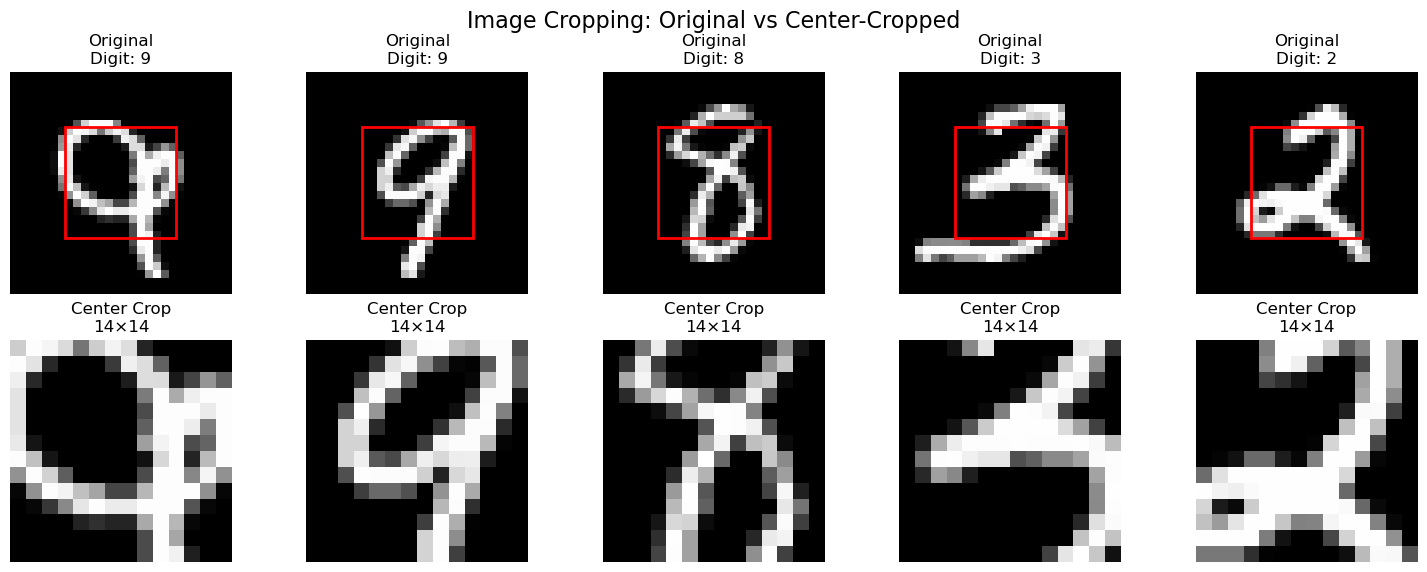


Shape Analysis:
  Original image shape: (28, 28)
  Cropped image shape: (14, 14)
  Dimension reduction: 784 → 196 pixels
  Reduction ratio: 25.00%

ADVANCED SLICING TECHNIQUES
----------------------------------------


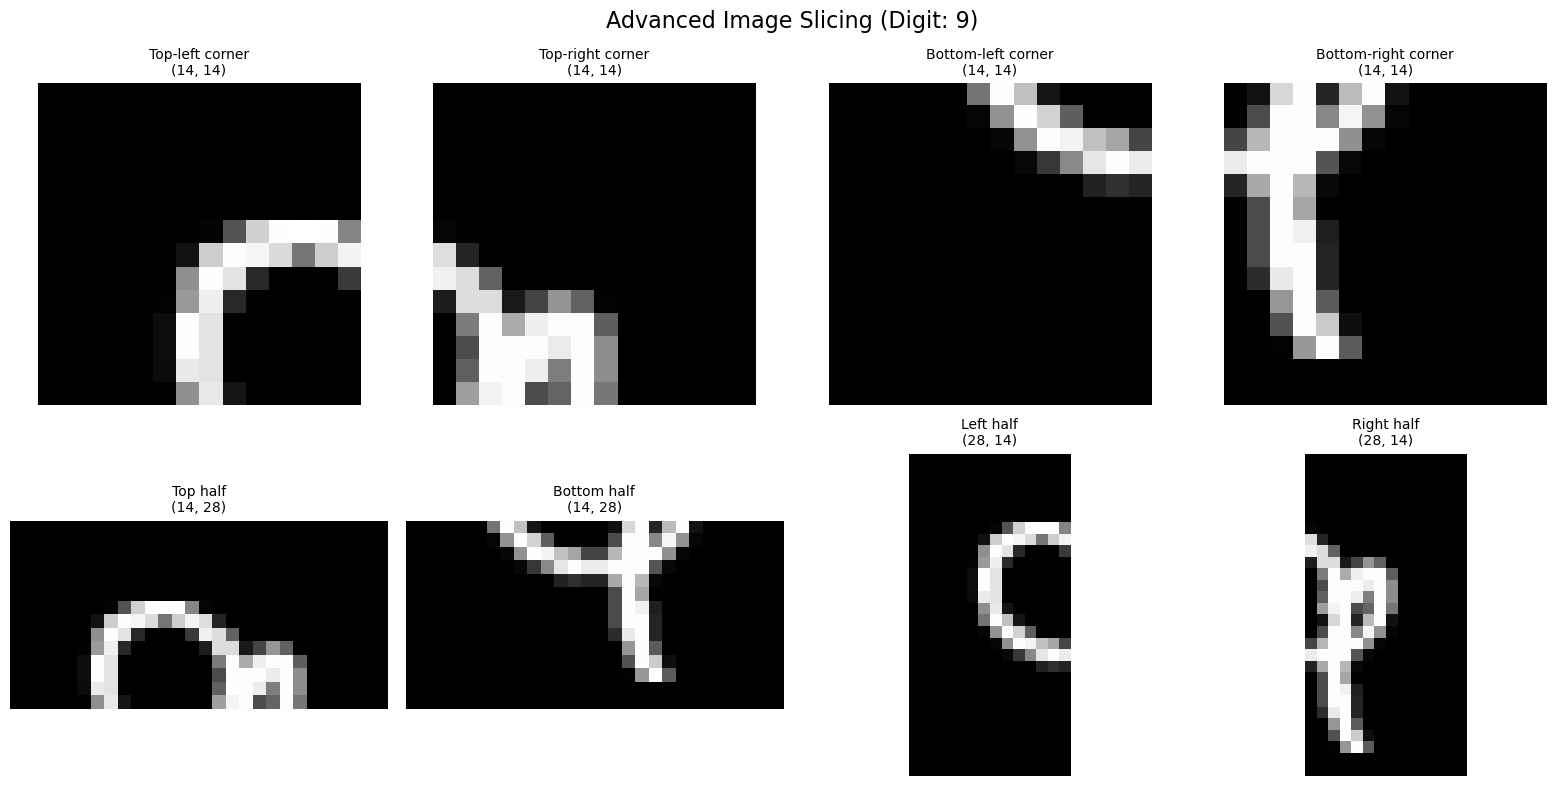

In [ ]:
def demonstrate_image_slicing(images, labels, n_samples=5):
    """
    Demonstrate various image slicing and cropping techniques.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels for each image
    n_samples : int, default=5
        Number of images to process and display
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'original_shapes': Shape of original images
        - 'cropped_images': List of center-cropped images
        - 'cropped_shapes': Shape of cropped images
    

    """
    print("IMAGE SLICING AND CROPPING DEMONSTRATIONS")
    
    raise NotImplementedError("Implement the function to demonstrate image slicing.")

    
    # Calculate center crop coordinates

    
    # Perform center cropping

    
    # Visualize original vs cropped images

    print("="*60)

    plt.tight_layout()
    plt.show()
    
    # Print shape information

    
    return {
        'original_shapes': ,
        'cropped_images': ,
        'cropped_shapes': ,
        'crop_coordinates':
    }

In [ ]:
# Demonstrate image slicing techniques
print("Applying image slicing to MNIST digits...")
cropping_results = demonstrate_image_slicing(images, labels, n_samples=5)


<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_advanced_slicing() function below. 

Your implementation should: 
    
1. **Define slicing operations dictionary** with 8 different regions:
    - 4 corner quadrants (top-left, top-right, bottom-left, bottom-right)
    - 4 half regions (top half, bottom half, left half, right half)
    - Use slice objects: slice(start, end) for each dimension

2. **Extract and visualize sliced regions**:
    - Apply each slicing operation to the first image
    - Create 2x4 subplot grid using plt.subplots(2, 4, figsize=(16, 8))
    - Display each sliced region with title showing name and shape
    - Use grayscale colormap with consistent scaling (vmin=0, vmax=255)

3. **Add proper formatting**:
    - Set subplot titles with region name and dimensions
    - Remove axes
    - Add overall title showing the digit label

4. Return results dictionary containing all sliced regions

</div>

In [ ]:
def demonstrate_advanced_slicing(images, labels, n_samples=3):
    """
    Demonstrate advanced image slicing techniques.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images  
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels
    n_samples : int, default=3
        Number of images to process
    
    Returns:
    --------
    dict : Various sliced regions (corners, edges, etc.)
    """
    print(f"\nADVANCED SLICING TECHNIQUES")

    raise NotImplementedError("Implement the function to demonstrate image slicing.")

    slicing_ops = {}

    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    return {name: img[y_slice, x_slice] for name, (y_slice, x_slice) in slicing_ops.items()}

In [ ]:
# Demonstrate advanced image slicing techniques
advanced_slicing_results = demonstrate_advanced_slicing(images, labels, n_samples=1)

## 4. Data Visualization: Statistical Analysis and Pattern Recognition

**Data visualization** is not just about making pretty plots—it's a crucial **analytical tool** for:

1. **Understanding data distributions**: Are features normally distributed? Skewed? Multimodal?
2. **Detecting outliers**: Values that might indicate errors or rare cases
3. **Revealing relationships**: Correlations, clusters, and patterns
4. **Assessing class separability**: Can classes be distinguished visually?
5. **Validating assumptions**: Do the data meet algorithm requirements?
6. **Debugging models**: Understanding where algorithms succeed or fail

### Statistical Distributions and Their Interpretation

To investigate the above stated phenomenons, data scientist have various tools to reveal information about the dataset.

**Histogram Analysis**: 

For feature $\mathbf{x}_j = (x_{1,j}, x_{2,j}, ..., x_{n,j})$

A **histogram** shows the **empirical probability distribution**:
- **Bins**: Intervals $[b_k, b_{k+1})$ that partition the data range
- **Frequency**: $f_k = |\{x_i : b_k \leq x_i < b_{k+1}\}|$
- **Density**: $p_k = \frac{f_k}{n \cdot \Delta b}$ where $\Delta b$ is bin width

**Common Distribution Patterns**:
- **Normal (Gaussian)**: Bell-shaped, symmetric around mean
  $$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
- **Skewed**: Asymmetric with long tail (positive/negative skew)
- **Uniform**: Approximately constant across range
- **Bimodal**: Two distinct peaks (might indicate mixed populations)
- **Heavy-tailed**: More extreme values than normal distribution

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the plot_feature_distributions() function below. 

Your implementation should: 

1. **Set up subplot grid**:
    - Calculate grid dimensions
    - Create figure with subplots
    - Handle different grid shapes (single feature, single row, multiple rows)

2. **Calculate statistics for each feature**:
    - Extract feature data
    - Compute mean, standard deviation, min, max values using NumPy
    - Calculate skewness
    - Store results in statistics dictionary

3. **Create histograms**:
    - Plot histogram with 20 bins, skyblue color and black edges
    - Add vertical lines for mean (red dashed) and +/- 1 std (orange dotted)
    - Set appropriate title showing statistics (mean, std, skewness)
    - Add axis labels, grid, and legend

4. **Print statistical summary** for all features with interpretation

5. **Return statistics dictionary** with means, stds, ranges, and skewness

</div>

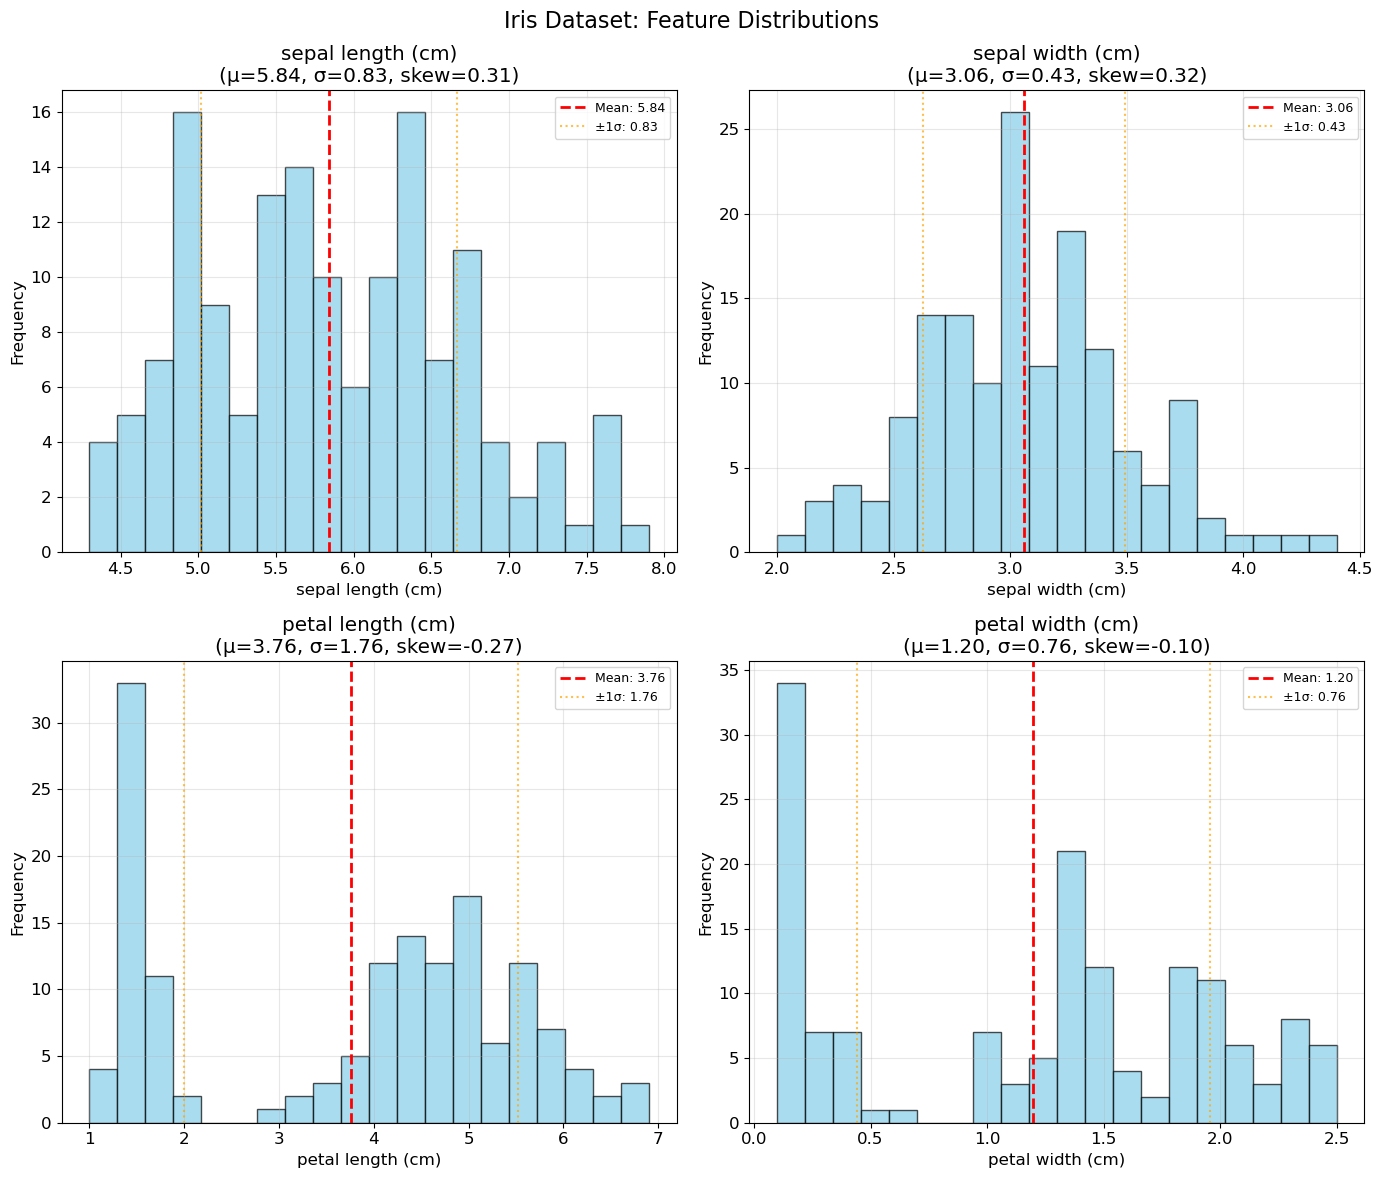

FEATURE DISTRIBUTION ANALYSIS
sepal length (cm):
  Range: [4.30, 7.90]
  Mean ± Std: 5.84 ± 0.83
  Skewness: 0.31 (approximately symmetric)

sepal width (cm):
  Range: [2.00, 4.40]
  Mean ± Std: 3.06 ± 0.43
  Skewness: 0.32 (approximately symmetric)

petal length (cm):
  Range: [1.00, 6.90]
  Mean ± Std: 3.76 ± 1.76
  Skewness: -0.27 (approximately symmetric)

petal width (cm):
  Range: [0.10, 2.50]
  Mean ± Std: 1.20 ± 0.76
  Skewness: -0.10 (approximately symmetric)



In [ ]:
# Hints:
# - μⱼ = (1/n) Σᵢ xᵢⱼ  (mean)
# - σⱼ = √[(1/(n-1)) Σᵢ (xᵢⱼ - μⱼ)²]  (standard deviation)
# - Skewness = E[(X-μ)³]/σ³  (distribution asymmetry measure)

def plot_feature_distributions(X, feature_names, title="Feature Distributions"):
    """
    Create histogram plots for all features to visualize their distributions and print statistical summaries.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    feature_names : list of str
        Names of the features
    title : str, default="Feature Distributions"
        Overall title for the plot
    
    Returns:
    --------
    dict : Statistical information about each feature:
        - 'means': Mean values per feature
        - 'stds': Standard deviations per feature  
        - 'skewness': Skewness values per feature
        - 'ranges': Min-max ranges per feature
    
    """

    raise NotImplementedError("Implement the function to plot feature distributions.")

    n_features = X.shape[1]
    
    # Calculate grid dimensions
    
    # Statistical analysis results
    stats = {
        'means': [],
        'stds': [],
        'ranges': [],
        'skewness': []
    }
    
    for idx in range(n_features):
        
        # Extract feature data
        
        # Calculate statistics

        # Store statistics
        stats['means'].append(mean_val)
        stats['stds'].append(std_val)
        stats['ranges'].append((min_val, max_val))
        stats['skewness'].append(skewness)
        
        # Create histogram
    
    # Hide empty subplots
    
    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary   
    for i, name in enumerate(feature_names):

    
    return stats



In [ ]:
# Visualize feature distributions for the Iris dataset
distribution_stats = plot_feature_distributions(X, feature_names, 
                                               title="Iris Dataset: Feature Distributions")

### Scatter Plots: Exploring Feature Relationships and Class Separability

A **scatter plot** visualizes the joint distribution of two features $(x_i, x_j)$:
- **X-axis**: Feature $i$ values
- **Y-axis**: Feature $j$ values  
- **Each point**: One data sample $(x_{k,i}, x_{k,j})$

Its a powefull tool to get a first impression of the data and provide guidance for further analysis. When points are colored by class, scatter plots reveal:

- **Linear separability**: Classes can be separated by a straight line
- **Cluster structure**: Distinct groups in feature space
- **Overlap regions**: Where classification will be difficult
- **Decision boundaries**: Where optimal separation might occur

**Correlation Analysis**:


The **Pearson correlation coefficient** measures linear relationship strength:
$$r_{ij} = \frac{\sum_{k=1}^n (x_{k,i} - \mu_i)(x_{k,j} - \mu_j)}{\sqrt{\sum_{k=1}^n (x_{k,i} - \mu_i)^2 \sum_{k=1}^n (x_{k,j} - \mu_j)^2}}$$

**Interpretation**:

- $r_{ij} = +1$: Perfect positive linear correlation
- $r_{ij} = 0$: No linear correlation (but nonlinear relationships may exist)
- $r_{ij} = -1$: Perfect negative linear correlation

**Correlation Strength**

- $|r_{ij}| > 0.7$: Strong correlation
- $|r_{ij}| < 0.3$: Weak correlation

Correlation analysis helps identify redundant features, where two variables carry similar information. Highly correlated features may lead to multicollinearity, which can negatively affect some models (e.g., linear regression). On the other hand, identifying uncorrelated or weakly correlated features can uncover complementary information, making them valuable for classification or prediction. However, correlation only captures linear relationships—nonlinear patterns may still exist even when $r_{ij} = 0$, so it's essential to combine correlation analysis with visual tools like scatter plots for a complete understanding.

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the plot_feature_relationships() function below. 

Your implementation should: 

1. **Set up feature pairs and grid layout**:
    - Calculate grid dimensions
    - Create subplot grid with appropriate figure size

2. **Compute correlation matrix**:
    - Use np.corrcoef(X.T) to calculate Pearson correlation coefficients
    - This gives correlation between all feature pairs

3. **Create scatter plots for each feature pair**:
    - Extract feature data
    - Plot points for each class with different colors and labels
    - Use scatter() with alpha=0.7, edgecolors='black', s=60
    - Calculate and mark class centroids with 'X' markers

5. **Format plots and add information**:
    - Set axis labels and titles with correlation values
    - Add grid, legend, and proper formatting
    - Hide unused subplots for clean appearance

6. **Print analysis**:
    - Display correlation score with interpretation (Strong/Moderate/Weak)

7. **Return results dictionary** with correlation_matrix and separability_scores

    
</div>

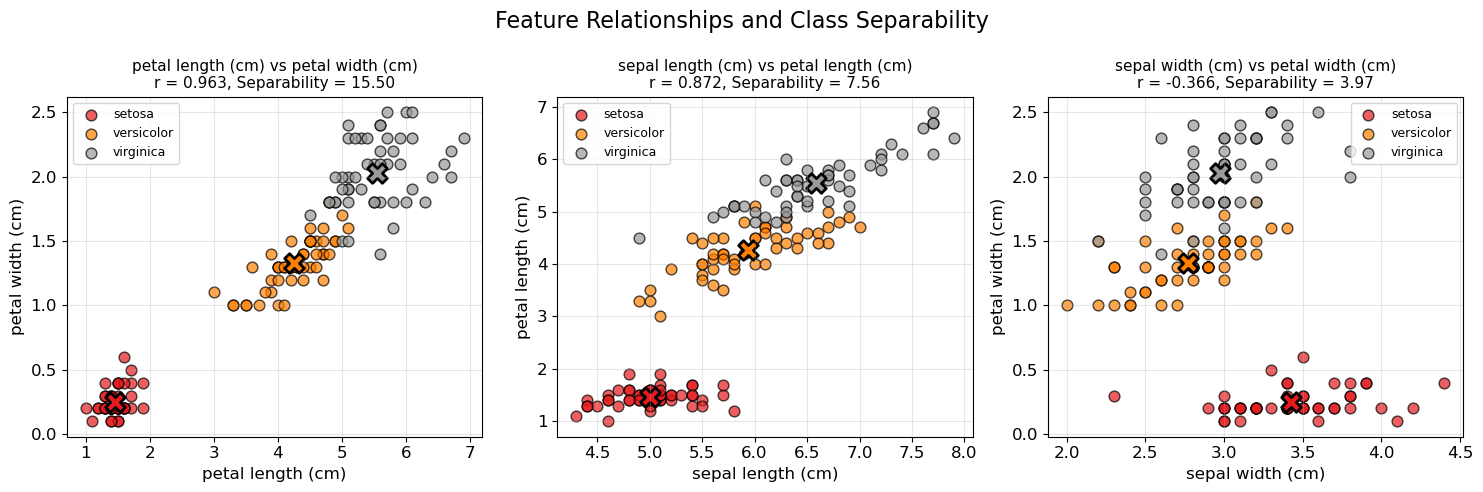

FEATURE RELATIONSHIP ANALYSIS
Correlation Matrix:
--------------------
sepal length (cm) (self): 1.000
sepal length (cm) vs sepal width (cm): -0.118 (Weak negative)
sepal length (cm) vs petal length (cm): 0.872 (Strong positive)
sepal length (cm) vs petal width (cm): 0.818 (Strong positive)
sepal width (cm) (self): 1.000
sepal width (cm) vs petal length (cm): -0.428 (Moderate negative)
sepal width (cm) vs petal width (cm): -0.366 (Moderate negative)
petal length (cm) (self): 1.000
petal length (cm) vs petal width (cm): 0.963 (Strong positive)
petal width (cm) (self): 1.000

Class Separability Scores:
-------------------------
petal length (cm) vs petal width (cm): 15.50 (Excellent)
sepal length (cm) vs petal length (cm): 7.56 (Excellent)
sepal width (cm) vs petal width (cm): 3.97 (Excellent)


In [ ]:
def plot_feature_relationships(X, y, feature_names, target_names, 
                               feature_pairs=None, figsize=(15, 10)):
    """
    Create scatter plots to visualize relationships between feature pairs.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    feature_pairs : list of tuples, optional
        Specific feature pairs to plot. If None, plots all combinations.
    figsize : tuple, default=(15, 10)
        Figure size for the plot
    
    Returns:
    --------
    dict : Correlation analysis results:
        - 'correlation_matrix': Pearson correlation coefficients
        - 'separability_scores': Class separability measures per feature pair

    """
    
    raise NotImplementedError("Implement the function to plot feature relationships.")

    # Define feature pairs to plot
    if feature_pairs is None:
    
    # Calculate grid dimensions
    
    # Craft the Scatter Plots
    
    # Hide empty subplots

    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    # Print analysis results
    return {
        'correlation_matrix': correlation_matrix,
    }

In [ ]:
# Analyze feature relationships in the Iris dataset
relationship_analysis = plot_feature_relationships(X, y, feature_names, target_names,
                                                  feature_pairs=[(2, 3), (0, 2), (1, 3)],
                                                  figsize=(15, 5))

### Image Data Visualization: Understanding Visual Patterns

For datasets like MNIST, each digit class has characteristic patterns:
- **Digit 0**: Circular structure, hollow center
- **Digit 1**: Vertical lines, minimal width
- **Digit 8**: Two loops, complex topology
- **Within-class variation**: Different handwriting styles
- **Between-class similarity**: Digits 6 and 9 are similar when rotated

Visualizing image data helps uncover both statistical properties and structural patterns relevant for classification or preprocessing.

**Pixel Intensity Analysis**:
For grayscale image $\mathbf{I} \in \mathbb{R}^{H \times W}$, we can analyze:

**Global Statistics**:

- **Mean intensity**: $\mu_I = \frac{1}{HW} \sum_{i=1}^H \sum_{j=1}^W I_{i,j}$
- **Standard deviation**: $\sigma_I = \sqrt{\frac{1}{HW-1} \sum_{i=1}^H \sum_{j=1}^W (I_{i,j} - \mu_I)^2}$
- **Dynamic range**: $[I_{min}, I_{max}]$ where $I_{min} = \min_{i,j} I_{i,j}$, $I_{max} = \max_{i,j} I_{i,j}$

These metrics give a first-order summary of brightness, contrast, and range in the image data.

**Histogram Analysis for Images**:

The **pixel intensity histogram** shows the distribution of brightness values. This analysis is useful for preprocessing steps like normalization, contrast adjustment, or thresholding.

- **Dark images**: Histogram concentrated at low values (0-100)
- **Bright images**: Histogram concentrated at high values (150-255)
- **High contrast**: Histogram spread across full range
- **Low contrast**: Histogram concentrated in narrow range

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the visualize_digit_examples() function below. 

Your implementation should: 

1. **Find unique digits** in the dataset and determine grid layout:
    - Use np.unique(labels) to find all digit classes present
    - Calculate grid dimensions
    - Create subplot grid with appropriate figure size

2. **Find and print examples**:
    - For each digit, find first occurrence using np.where(labels == digit)[0]
    - Store example index and count total samples per class
    - Display image using imshow() with grayscale colormap and proper scaling
    - Set title showing digit value and sample count

3. **Handle edge cases**:
    - If no samples exist for a digit, display "No samples" message
    - Hide unused subplots for clean appearance
    - Remove axis ticks for cleaner visualization

4. **Print class distribution analysis**:
    - Show sample count and percentage for each digit class
    - Format output clearly with proper alignment

5. **Return analysis results** a dictionary with example_indices and class_counts
    
</div>

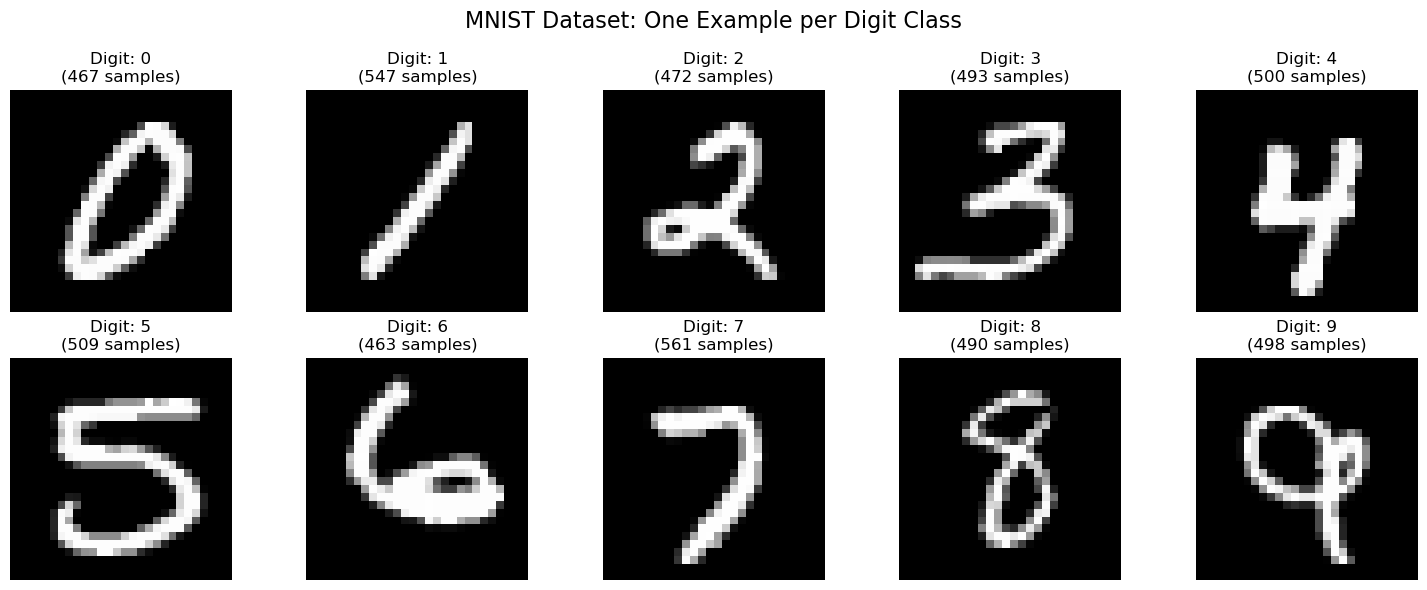

CLASS DISTRIBUTION ANALYSIS:
------------------------------
Digit 0:  467 samples (  9.3%)
Digit 1:  547 samples ( 10.9%)
Digit 2:  472 samples (  9.4%)
Digit 3:  493 samples (  9.9%)
Digit 4:  500 samples ( 10.0%)
Digit 5:  509 samples ( 10.2%)
Digit 6:  463 samples (  9.3%)
Digit 7:  561 samples ( 11.2%)
Digit 8:  490 samples (  9.8%)
Digit 9:  498 samples ( 10.0%)


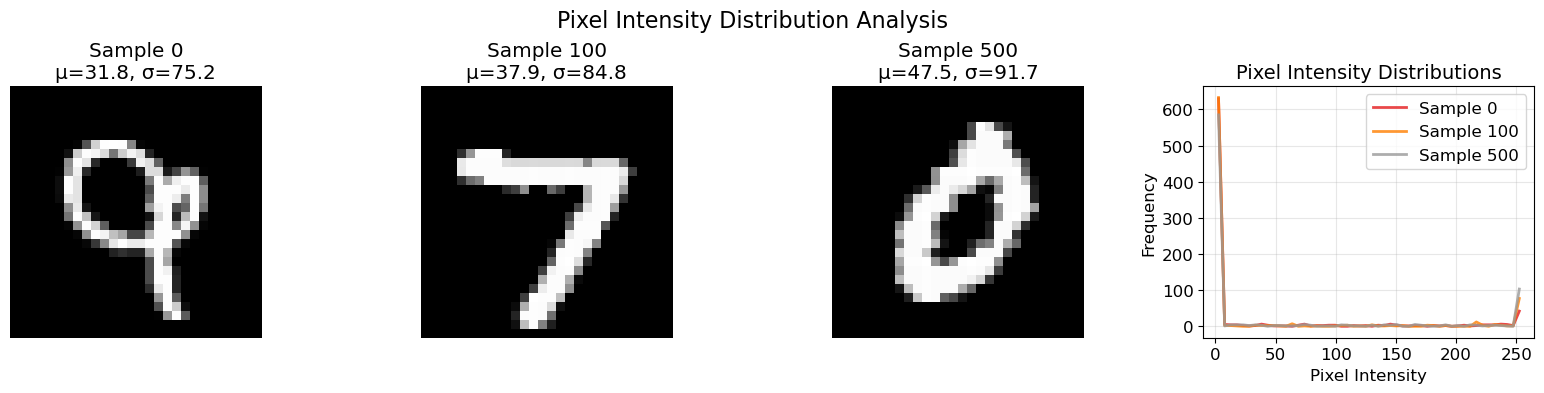

PIXEL INTENSITY STATISTICS:
-----------------------------------
Sample 0:
  Intensity range: [0, 255]
  Mean ± Std: 31.8 ± 75.2
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast

Sample 100:
  Intensity range: [0, 255]
  Mean ± Std: 37.9 ± 84.8
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast

Sample 500:
  Intensity range: [0, 255]
  Mean ± Std: 47.5 ± 91.7
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast



In [ ]:
def visualize_digit_examples(images, labels, title="Digit Examples"):
    """
    Display one example of each digit class (0-9) from the dataset.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_samples, height, width)
        Array of digit images
    labels : numpy.ndarray of shape (n_samples,)
        Corresponding digit labels (0-9)
    title : str, default="Digit Examples"
        Title for the visualization
    
    Returns:
    --------
    dict : Information about the examples:
        - 'example_indices': Index of the example used for each digit
        - 'class_counts': Number of samples per digit class
    
    """
    raise NotImplementedError("Implement the function to visualize digit examples.") 

    unique_digits = np.unique(labels)
    
    # Calculate grid dimensions

    # Craft the Subplots and extract statistics    
    for i, digit in enumerate(unique_digits):

    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    # Print class distribution
    for digit in sorted(class_counts.keys()):
    
    return {
        'example_indices': example_indices,
        'class_counts': class_counts
    }

In [ ]:
# Visualize examples of each digit class
digit_examples = visualize_digit_examples(images, labels, 
                                         title="MNIST Dataset: One Example per Digit Class")

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the analyze_pixel_intensity_distribution() function below. 

Your implementation should: 
    
1. **Set up analysis parameters**:
    - Handle sample_indices parameter
    - Calculate grid layout for visualization
    - Create subplot grid with extra column for combined histogram

2. **Statistical analysis for each sample**:
    - Extract and flatten image
    - Calculate statistical measures: mean, std, min, max using NumPy
    - Store results in analysis_results dictionary
    - Generate histogram data: np.histogram(pixels, bins=50, range=(0, 255))

3. **Create visualizations**:
    - Display original images with statistical info in titles
    - Create individual histograms showing pixel intensity distributions
    - Combine all histograms in final subplot with different colors
    - Use proper labels, legends, and formatting

4. **Print detailed statistical summary**:
    - Show intensity ranges, mean ± std for each sample
    - Calculate dynamic range (max - min)

5. **Return comprehensive results**:
    - Dictionary with mean_intensities, std_intensities, intensity_ranges
    - Include histogram_data
    
</div>

In [ ]:
def analyze_pixel_intensity_distribution(images, sample_indices=None, title="Pixel Intensity Analysis"):
    """
    Analyze and visualize pixel intensity distributions in images.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_samples, height, width)
        Array of images
    sample_indices : list or None, default=None
        Specific image indices to analyze. If None, analyzes first image.
    title : str, default="Pixel Intensity Analysis"
        Title for the visualization
    
    Returns:
    --------
    dict : Statistical analysis results:
        - 'mean_intensities': Mean pixel intensity per image
        - 'std_intensities': Standard deviation per image
        - 'intensity_ranges': Min-max ranges per image
        - 'histogram_data': Histogram data for visualization

    """

    raise NotImplementedError("Implement the function to analyze pixel intensity distribution.")
    
    analysis_results = {
        'mean_intensities': [],
        'std_intensities': [],
        'intensity_ranges': [],
        'histogram_data': []
    }
    

    # Calculate grid for subplots


    # Calculate statistics and plot images
    for idx, sample_idx in enumerate(sample_indices):       
        # Extract image and flatten for analysis
        
        # Statistical analysis
        
        # Display original image

        # Create histogram
    
    # Combined histogram plot

    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    
    return analysis_results

In [ ]:
# Analyze pixel intensity distributions for sample images
intensity_analysis = analyze_pixel_intensity_distribution(images, 
                                                        sample_indices=[0, 100, 500], 
                                                        title="Pixel Intensity Distribution Analysis")